https://codelabs.developers.google.com/?cat=TensorFlow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()
print('Training Images Shape: {}'.format(training_images.shape))
print('Testing Images Shape: {}'.format(testing_images.shape))

4423680/4422102 [==============================] - 0s 0us/step
Training Images Shape: (60000, 28, 28)
Testing Images Shape: (10000, 28, 28)


Now lets reshape these lists so that we can add them to the the input of the Convolution layer

In [0]:
training_images = training_images.reshape(60000,28,28,1)  # 1 as the images are grayscale
training_images = training_images / 255
testing_images = testing_images.reshape(10000,28,28,1)
testing_images = testing_images / 255

Let's define our MODEL

for a Conv2D layer params = 
64(number of filters to be used) 
(3,3) = filter size


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))



W0715 04:38:39.366793 139900224804736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Let's define our optimiser and loss function

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Callbacks can be your friend and save you loads of time!

In [1]:
# Define a callback to stop training once accuracy reaches above 94%

class accuracyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.95):
      print("\n Reached 95% accuracy so stopping training!")
      self.model.stop_training = True
      
# instantiate your callback
myCallback = accuracyCallback()

print(training_images.shape)

NameError: ignored

**THE ABOVE SUMMARY SHOWS THE ARCHITECTURE OF OUR MODEL**

***NOW LETS TRY AND FIT/TRAIN OUR MODEL ON OUR DATA***


In [0]:
model.fit(training_images,training_labels, epochs = 5,callbacks=[myCallback])

Epoch 1/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.0764 - acc: 0.9711
 Reached 95% accuracy so stopping training!
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0764 - acc: 0.9711


In [0]:
test_loss,test_accuracy = model.evaluate(testing_images,testing_labels)
print('Test loss: {}, Test Accuracy: {}'.format(test_loss,test_accuracy * 100))

10000/10000 [==============================] - 4s 428us/sample - loss: 0.3355 - acc: 0.9105
Test loss: 0.3355233331680298, Test Accuracy: 91.04999899864197


Visualizing the convolutions


In [0]:
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


VISUALIZING THE CONVOLUTIONS. Well let's try and vizualize a few outputs of the layers.

Lets pick 0 23 and 28 as they all have the class 9 (shoes)


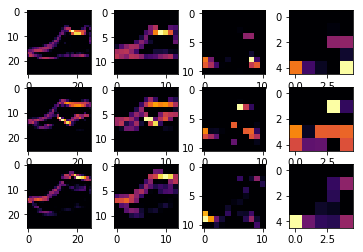

In [0]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0         # All 3 images belong to the same class(9)
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 9 
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Define a Method to create a Model. Then we  can try out different input params 

In [0]:
def create_model(convolutions,input_dims,filter_size=2):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(convolutions,(filter_size,filter_size),activation='relu', input_shape=input_dims))
  model.add(tf.keras.layers.MaxPooling2D(2,2))
  model.add(tf.keras.layers.Conv2D(convolutions,(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(2,2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  return model


In [0]:
# first model with 32 convolutions instead of 64 and a filter size of 3x3

model_32 = create_model(32,(28,28,1),3)
model_32.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_32.summary()
model_32.fit(training_images,training_labels,epochs = 5,callbacks=[myCallback])
model_32.evaluate(testing_images,testing_labels)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

[0.2622802505731583, 0.9056]

In [0]:
# Second one with even lower(16) convolutions instead of 64 and a filter size of 3x3

model_16 = create_model(16,(28,28,1),3)
model_16.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_16.summary()
model_16.fit(training_images,training_labels,epochs = 5,callbacks=[myCallback])
model_16.evaluate(testing_images,testing_labels)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

[0.29776373695135117, 0.8922]

Our models show us that as we lower the number of convolutions the accuracy decrease a bit although not by much. Same goes for our training time, from this example.

Essentially the number of convolutions links to the complexity of our image. You can think of convolutions to be more or less like feature extractors. The more complex your image the more features it can have, and a higher number of convolutions can help identify the image better.


In [0]:
# Let's try and create a model with extra and less convolutions and let's compare their outputs!
model_1conv = tf.keras.Sequential()
model_1conv.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model_1conv.add(tf.keras.layers.MaxPooling2D(2,2))
model_1conv.add(tf.keras.layers.Flatten())
model_1conv.add(tf.keras.layers.Dense(128,activation='relu'))
model_1conv.add(tf.keras.layers.Dense(10,activation='softmax'))


model_1conv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1conv.summary()
model_1conv.fit(training_images,training_labels, epochs = 5, callbacks=[myCallback])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3741 - acc: 0.8675
Epoch 2/5

As we can see the accuracy increased a bit, that can mostly be attributed to the presence of more parameters than the previous model. ( Each convolution here has decreased the size of the image and the corresponding pooling further decrease  the image dimensions greatly reducing the number of input parameters to dense layer).
However, the feature maps gathered by convolution layers are missing too. Like rest of machine learning this is another tradeoff one must test out depending on their input data and case study.

In [0]:
# Now let's try one with more convolution layers
model_3conv = tf.keras.Sequential()
model_3conv.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model_3conv.add(tf.keras.layers.MaxPooling2D(2,2))
model_3conv.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model_3conv.add(tf.keras.layers.MaxPooling2D(2,2))
model_3conv.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model_3conv.add(tf.keras.layers.MaxPooling2D(2,2))
model_3conv.add(tf.keras.layers.Flatten())
model_3conv.add(tf.keras.layers.Dense(128,activation='relu'))
model_3conv.add(tf.keras.layers.Dense(10,activation='softmax'))


model_3conv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_3conv.summary()
model_3conv.fit(training_images,training_labels, epochs = 5, callbacks=[myCallback])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)              

As expected due to a lack of training features the model has lower training accuracy as compared to the model with lower convolutions and higher features. (P.S. we could maintain the size  of the image using 'same' padding while using convolutions)

In [0]:
print('Model with 3 convolution Evaluation:')
model_3conv.evaluate(testing_images,testing_labels)
print('Model with 1 convolution Evaluation:')
model_1conv.evaluate(testing_images,testing_labels)

Model with 3 convolution Evaluation:
10000/10000 [==============================] - 4s 448us/sample - loss: 0.3237 - acc: 0.8805
Model with 1 convolution Evaluation:
10000/10000 [==============================] - 4s 445us/sample - loss: 0.3450 - acc: 0.8742


[0.345024684882164, 0.8742]